## CAP 394 - Introduction to Data Science
### Trabalho Final: Análise de Índices Espectrais e Métodos de Aprendizado de Máquina para Detecção de Áreas Queimadas
#### Alunos: Fabiana Zioti, Gabriel Sansigolo, Rafael Mariano

In [4]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

Atribui o arquivo shape na variável queimadas

In [9]:
queimadas = gpd.read_file("DS/221_067_2017.shp")

In [10]:
queimadas.head()

,id,cod_sat,cena_id,nome_arq,orb_pto,area_ha,perim,n_arq_ant,ndvi,nbrl,...,medianb4,medianb5,medianb6,medianb7,verifica,proc_id,focos,data_atual,data_anter,geometry
0,23946449,8,LC82210672017125LGN00,LC82210672017125LGN00.tar.gz,221_067,12.968645,2639,LC82210672017109LGN00.tar.bz,0.211523,-0.044128,...,0.144337,0.227026,0.304834,0.245830,1,5886,2,2017-05-05,2017-04-19 00:00:00,"POLYGON ((-46.9715795250224 -10.3363584942161,..."
1,23946450,8,LC82210672017125LGN00,LC82210672017125LGN00.tar.gz,221_067,1.263320,600,LC82210672017109LGN00.tar.bz,0.042114,-0.027508,...,0.040925,0.044027,0.049672,0.046862,1,5886,0,2017-05-05,2017-04-19 00:00:00,"POLYGON ((-46.358025045795 -10.3373571795547, ..."
2,23946451,8,LC82210672017125LGN00,LC82210672017125LGN00.tar.gz,221_067,7.568930,2340,LC82210672017109LGN00.tar.bz,0.306289,-0.003284,...,0.083032,0.151609,0.205350,0.169358,1,5886,1,2017-05-05,2017-04-19 00:00:00,"POLYGON ((-46.9860921817999 -10.3359982294198,..."
3,23946452,8,LC82210672017125LGN00,LC82210672017125LGN00.tar.gz,221_067,1.804195,660,LC82210672017109LGN00.tar.bz,0.256839,-0.017937,...,0.143473,0.242181,0.360290,0.251297,0,5886,0,2017-05-05,2017-04-19 00:00:00,"POLYGON ((-46.0128759745859 -10.3521908768478,..."
4,23946453,8,LC82210672017125LGN00,LC82210672017125LGN00.tar.gz,221_067,2.886433,1140,LC82210672017109LGN00.tar.bz,0.240240,0.000871,...,0.116126,0.195281,0.244584,0.189877,1,5886,2,2017-05-05,2017-04-19 00:00:00,"POLYGON ((-46.3574643464459 -10.3343756813685,..."


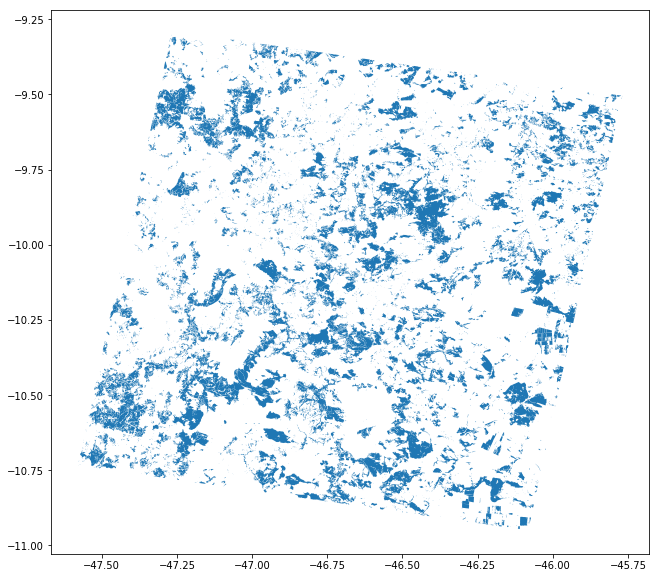

In [11]:
queimadas.plot(markersize=5, figsize=(20, 10))

In [13]:
queimadas.dtypes

id              int64
cod_sat         int64
cena_id        object
nome_arq       object
orb_pto        object
area_ha       float64
perim           int64
n_arq_ant      object
ndvi          float64
nbrl          float64
dif_ndvi      float64
dif_dnbrl     float64
medianb1       object
medianb2      float64
medianb3      float64
medianb4      float64
medianb5      float64
medianb6      float64
medianb7      float64
verifica        int64
proc_id         int64
focos           int64
data_atual     object
data_anter     object
geometry       object
dtype: object

Altera o formato da coluna para facilitar manipulação

In [15]:
queimadas["data_atual"] = pd.to_datetime(queimadas["data_atual"])
queimadas["data_anter"] = pd.to_datetime(queimadas["data_anter"])

In [16]:
queimadas.dtypes

id                     int64
cod_sat                int64
cena_id               object
nome_arq              object
orb_pto               object
area_ha              float64
perim                  int64
n_arq_ant             object
ndvi                 float64
nbrl                 float64
dif_ndvi             float64
dif_dnbrl            float64
medianb1              object
medianb2             float64
medianb3             float64
medianb4             float64
medianb5             float64
medianb6             float64
medianb7             float64
verifica               int64
proc_id                int64
focos                  int64
data_atual    datetime64[ns]
data_anter    datetime64[ns]
geometry              object
dtype: object

In [17]:
queimadas.verifica.unique()

array([1, 0])

Visualiza apenas as areas queimadas

In [18]:
queimadas_validadas = queimadas[queimadas.verifica == 1]

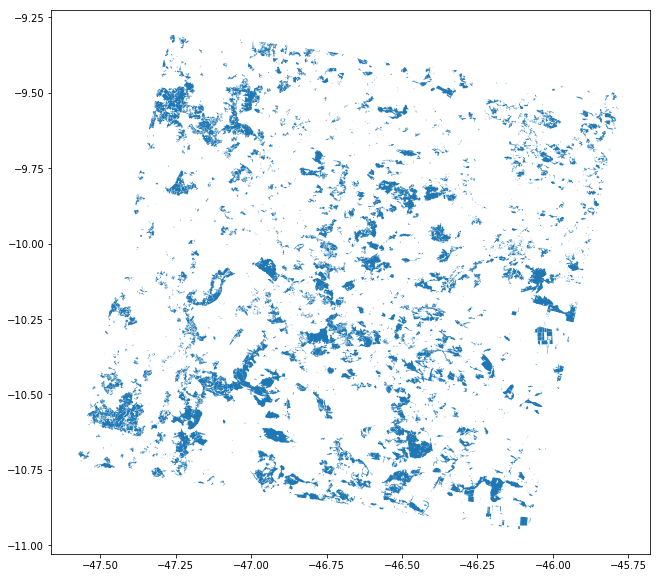

In [19]:
queimadas_validadas.plot(markersize=5, figsize=(20, 10) )

Visualiza as áreas não validadas

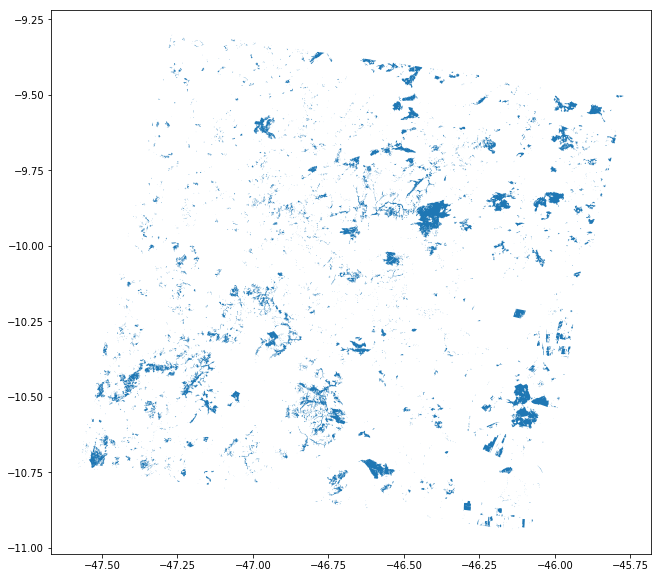

In [20]:
queimadas_nvalidadas = queimadas[queimadas.verifica == 0]
queimadas_nvalidadas.plot(markersize=5, figsize=(20, 10) )

Distribuição das Queimadas ao logo dos meses

In [23]:
queimadas_mes = queimadas.groupby(queimadas.data_atual.dt.month).area_ha.count()

In [24]:
queimadas_mes

data_atual
5     3617
6     2299
7     2022
8     1677
9     2086
10    3969
Name: area_ha, dtype: int64

In [25]:
import calendar

novo_indice = map(lambda v : calendar.month_abbr[v], queimadas_mes.index)

l = list(novo_indice)

l

['May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']

In [26]:
type(queimadas_mes)

pandas.core.series.Series

In [27]:
queimadas_mes = pd.Series(data=queimadas_mes.values, index=l)
type(queimadas_mes)

pandas.core.series.Series

In [28]:
queimadas_mes.name= "Número Focos/Mês"

queimadas_mes.index.name="mes"

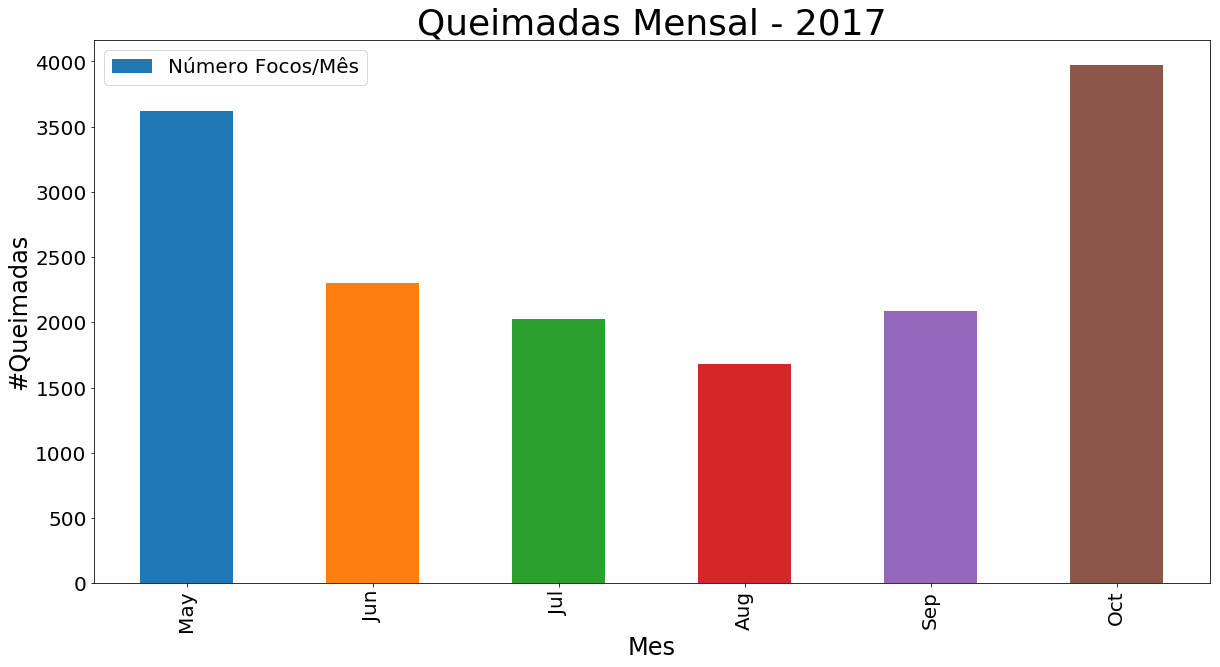

In [30]:
ax  = queimadas_mes.plot(kind="bar", legend=True, fontsize=20, figsize=(20,10));
ax.set_title("Queimadas Mensal - 2017", fontsize=36);
ax.set_xlabel("Mes", fontsize=24);
ax.set_ylabel("#Queimadas", fontsize=24);
ax.legend(loc=2, prop={'size': 20});

In [31]:
import seaborn as sns

In [32]:
queimadas_2 = queimadas.copy()

In [40]:
queimadas_2['mes_atual'] = queimadas_2['data_atual'].dt.month
queimadas_2['mes_anterior'] = queimadas_2['data_anter'].dt.month

,id,cod_sat,cena_id,nome_arq,orb_pto,area_ha,perim,n_arq_ant,ndvi,nbrl,...,medianb7,verifica,proc_id,focos,data_atual,data_anter,geometry,mes_atual,hora_atual,mes_anterior
0,23946449,8,LC82210672017125LGN00,LC82210672017125LGN00.tar.gz,221_067,12.968645,2639,LC82210672017109LGN00.tar.bz,0.211523,-0.044128,...,0.245830,1,5886,2,2017-05-05,2017-04-19,"POLYGON ((-46.9715795250224 -10.3363584942161,...",5,0,4
1,23946450,8,LC82210672017125LGN00,LC82210672017125LGN00.tar.gz,221_067,1.263320,600,LC82210672017109LGN00.tar.bz,0.042114,-0.027508,...,0.046862,1,5886,0,2017-05-05,2017-04-19,"POLYGON ((-46.358025045795 -10.3373571795547, ...",5,0,4
2,23946451,8,LC82210672017125LGN00,LC82210672017125LGN00.tar.gz,221_067,7.568930,2340,LC82210672017109LGN00.tar.bz,0.306289,-0.003284,...,0.169358,1,5886,1,2017-05-05,2017-04-19,"POLYGON ((-46.9860921817999 -10.3359982294198,...",5,0,4
3,23946452,8,LC82210672017125LGN00,LC82210672017125LGN00.tar.gz,221_067,1.804195,660,LC82210672017109LGN00.tar.bz,0.256839,-0.017937,...,0.251297,0,5886,0,2017-05-05,2017-04-19,"POLYGON ((-46.0128759745859 -10.3521908768478,...",5,0,4
4,23946453,8,LC82210672017125LGN00,LC82210672017125LGN00.tar.gz,221_067,2.886433,1140,LC82210672017109LGN00.tar.bz,0.240240,0.000871,...,0.189877,1,5886,2,2017-05-05,2017-04-19,"POLYGON ((-46.3574643464459 -10.3343756813685,...",5,0,4


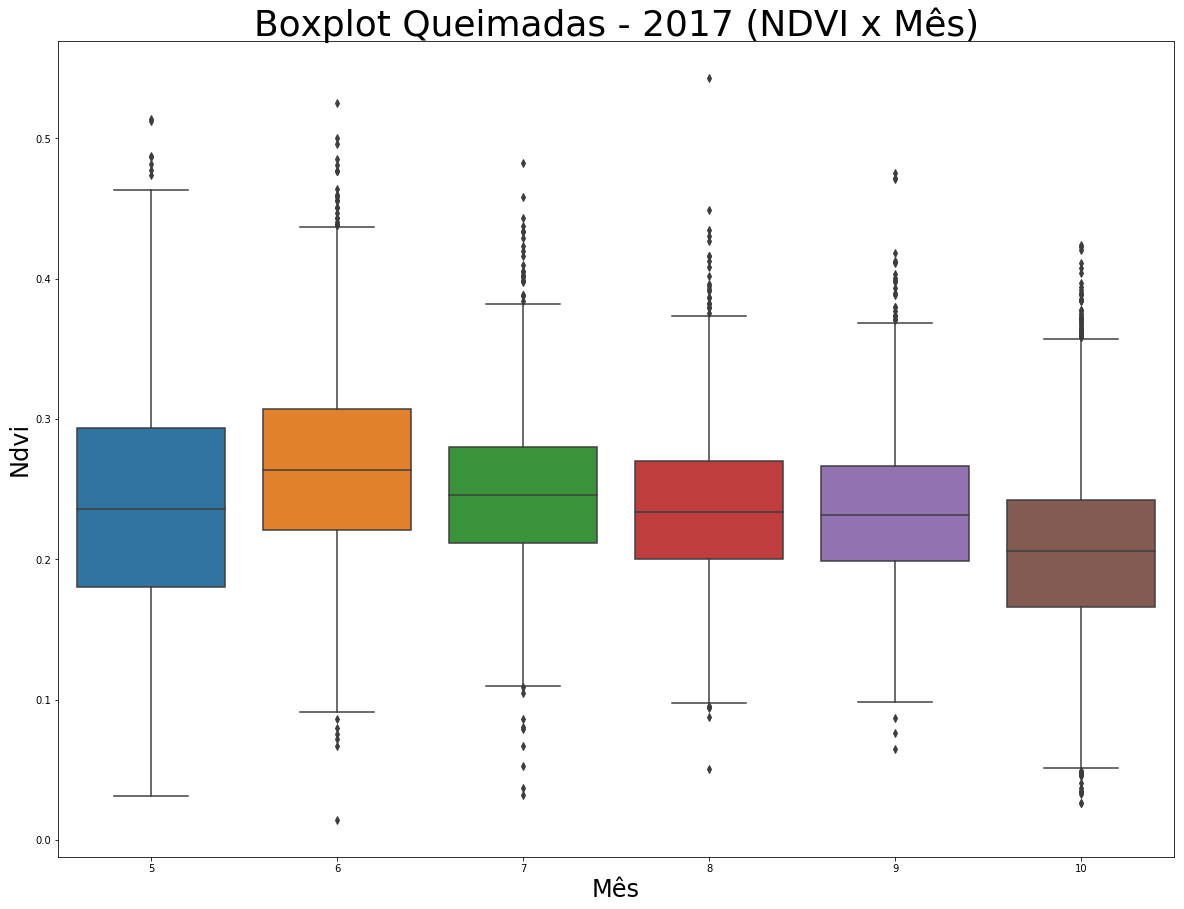

In [47]:
fig, ax = plt.subplots(figsize=(20,15))
sns.boxplot(y="ndvi", x="mes_atual", data=queimadas_2,ax=ax);
ax.set_title("Boxplot Queimadas - 2017 (NDVI x Mês)", fontsize=36);
plt.xlabel("Mês", fontsize=24)
plt.ylabel("Ndvi", fontsize=24);